# Importing Packgages 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# Loading DataSet

In [40]:
df=pd.read_csv("dropouts.csv")
df.head(10)

,student_id,years,entrance_test_score,enroll_date_time,course_id,Course_progress,online,gender,international,complete
0,172777,0,47.0,159227767,807728,76,no,1,no,yes
1,172777,0,47.0,159227782,658434,67,no,1,no,yes
2,172777,0,47.0,159227866,658463,64,no,1,no,yes
3,172777,0,47.0,159227948,658498,69,no,1,no,yes
4,175658,0,92.8,157446419,807728,80,no,1,no,yes
5,175658,5,92.8,157446424,658434,82,no,1,no,no
6,175658,4,92.8,157446441,658463,75,no,1,no,no
7,175658,4,92.8,157446449,658498,70,no,1,no,no
8,175658,0,92.8,157446458,807754,98,no,1,no,yes
9,175658,5,92.8,157446463,658438,82,no,1,no,no


# Data Preprosessing and cleaning

## Replacing values

In [41]:
df['online'] = df['online'].replace(['no'],0)
df['online'] = df['online'].replace(['yes'],1)
df['complete'] = df['complete'].replace(['no'],0)
df['complete'] = df['complete'].replace(['yes'],1)
df['international'] = df['international'].replace(['no'],0)
df['international'] = df['international'].replace(['yes'],1)
df

,student_id,years,entrance_test_score,enroll_date_time,course_id,Course_progress,online,gender,international,complete
0,172777,0,47.0,159227767,807728,76,0,1,0,1
1,172777,0,47.0,159227782,658434,67,0,1,0,1
2,172777,0,47.0,159227866,658463,64,0,1,0,1
3,172777,0,47.0,159227948,658498,69,0,1,0,1
4,175658,0,92.8,157446419,807728,80,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
5856,295097,0,0.0,159550455,807728,70,0,2,0,1
5857,295097,0,0.0,159550594,658434,72,0,2,0,0
5858,295097,0,0.0,159551590,658463,66,0,2,0,0
5859,299198,0,0.0,160838118,807728,60,0,2,0,1


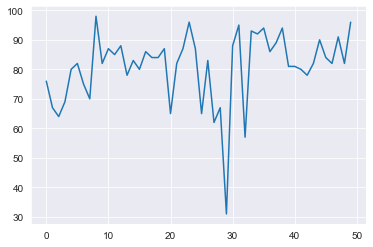

In [42]:
x=df["Course_progress"]
y=x[0:50]
plt.plot(y)

## Calculation of Statistcial Measures over Course Progress

In [43]:
x = df['Course_progress'].rolling(window=5).skew()
x=x.tolist()
x=x[4:]+x[:4]
df["Skewness"] = x
sma = df['Course_progress'].rolling(window=5).std()
sma=sma.tolist()
sma=sma[4:]+sma[:4]
df["Standard_Deviation"] = sma
y = df['Course_progress'].rolling(window=5).kurt()
y=y.tolist()
y=y[4:]+y[:4]
df["Kurtosis"] = y

In [44]:
df

,student_id,years,entrance_test_score,enroll_date_time,course_id,Course_progress,online,gender,international,complete,Skewness,Standard_Deviation,Kurtosis
0,172777,0,47.0,159227767,807728,76,0,1,0,1,0.481856,6.610598,-1.749132
1,172777,0,47.0,159227782,658434,67,0,1,0,1,0.421847,8.080842,-2.784252
2,172777,0,47.0,159227866,658463,64,0,1,0,1,-0.388518,7.516648,-1.727778
3,172777,0,47.0,159227948,658498,69,0,1,0,1,0.098142,5.805170,-2.631264
4,175658,0,92.8,157446419,807728,80,0,1,0,1,1.183248,10.583005,1.911113
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5856,295097,0,0.0,159550455,807728,70,0,2,0,1,-2.012439,22.387497,4.152314
5857,295097,0,0.0,159550594,658434,72,0,2,0,0,NaN,NaN,NaN
5858,295097,0,0.0,159551590,658463,66,0,2,0,0,NaN,NaN,NaN
5859,299198,0,0.0,160838118,807728,60,0,2,0,1,NaN,NaN,NaN


## Checking for null Values

In [45]:
df.isnull().sum()

student_id             0
years                  0
entrance_test_score    0
enroll_date_time       0
course_id              0
Course_progress        0
online                 0
gender                 0
international          0
complete               0
Skewness               4
Standard_Deviation     4
Kurtosis               4
dtype: int64

## Droping Null Values

In [46]:
df=df.dropna()

In [47]:
df

,student_id,years,entrance_test_score,enroll_date_time,course_id,Course_progress,online,gender,international,complete,Skewness,Standard_Deviation,Kurtosis
0,172777,0,47.0,159227767,807728,76,0,1,0,1,0.481856,6.610598,-1.749132
1,172777,0,47.0,159227782,658434,67,0,1,0,1,0.421847,8.080842,-2.784252
2,172777,0,47.0,159227866,658463,64,0,1,0,1,-0.388518,7.516648,-1.727778
3,172777,0,47.0,159227948,658498,69,0,1,0,1,0.098142,5.805170,-2.631264
4,175658,0,92.8,157446419,807728,80,0,1,0,1,1.183248,10.583005,1.911113
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,294733,5,0.0,159394514,658434,79,0,1,0,0,-1.632502,20.969025,2.652954
5853,294733,0,0.0,159395317,658463,61,0,1,0,0,-1.743560,19.854471,3.176373
5854,294763,0,0.0,160062775,807728,78,0,1,0,1,-1.971060,19.929877,4.121874
5855,294763,0,0.0,160062795,658434,28,0,1,0,0,-1.896996,18.033303,3.703608


# Rearranging Features

In [48]:
cols = df.columns.tolist()
cols=cols[0:9]+cols[10:]+cols[9:10]

In [49]:
df=df[cols]
df

,student_id,years,entrance_test_score,enroll_date_time,course_id,Course_progress,online,gender,international,Skewness,Standard_Deviation,Kurtosis,complete
0,172777,0,47.0,159227767,807728,76,0,1,0,0.481856,6.610598,-1.749132,1
1,172777,0,47.0,159227782,658434,67,0,1,0,0.421847,8.080842,-2.784252,1
2,172777,0,47.0,159227866,658463,64,0,1,0,-0.388518,7.516648,-1.727778,1
3,172777,0,47.0,159227948,658498,69,0,1,0,0.098142,5.805170,-2.631264,1
4,175658,0,92.8,157446419,807728,80,0,1,0,1.183248,10.583005,1.911113,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,294733,5,0.0,159394514,658434,79,0,1,0,-1.632502,20.969025,2.652954,0
5853,294733,0,0.0,159395317,658463,61,0,1,0,-1.743560,19.854471,3.176373,0
5854,294763,0,0.0,160062775,807728,78,0,1,0,-1.971060,19.929877,4.121874,1
5855,294763,0,0.0,160062795,658434,28,0,1,0,-1.896996,18.033303,3.703608,0


# Feature Engineering

1    4136
0    1721
Name: complete, dtype: int64

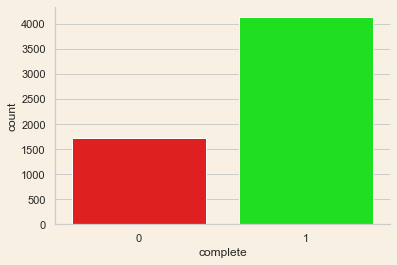

In [75]:
sns.set(style = 'whitegrid' ,rc={'axes.facecolor':'#f8f0e3', 'figure.facecolor':'#f8f0e3', "axes.spines.right": False, "axes.spines.top": False})
sns.countplot(x='complete', data=df, palette=["#FF0000", "#00FF00"])
df['complete'].value_counts()

In [ ]:
sns.countplot(x='M/F', data=df, palette=["#003F7D", "#FD7702"])

# Feature selction and Model fitting

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x = df.iloc[:, 1:11]
y = df.iloc[:, 12:]

# Corelation Matrix

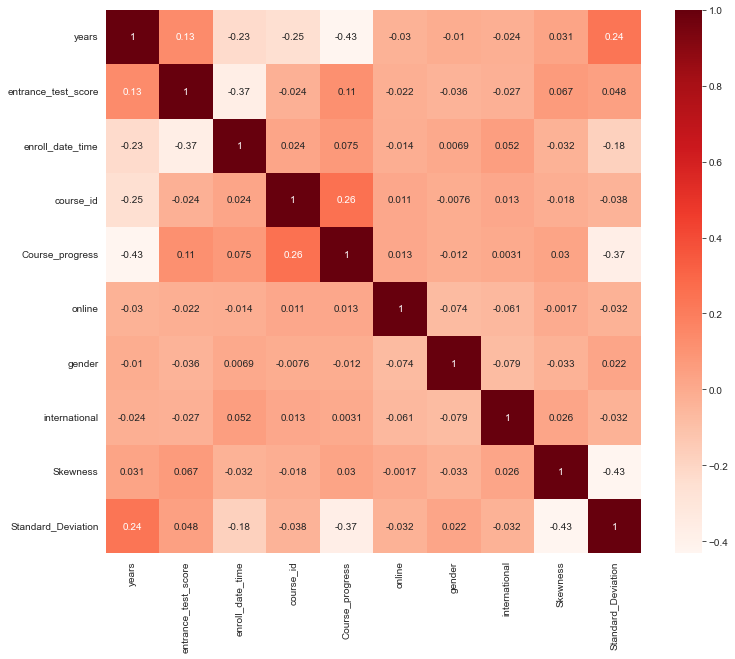

In [53]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [55]:
x_train

,years,entrance_test_score,enroll_date_time,course_id,Course_progress,online,gender,international,Skewness,Standard_Deviation
1424,0,6.700,151394530,658434,61,1,1,0,-0.640793,26.034592
3050,0,2.300,159210726,807728,68,1,1,0,-0.787509,6.804410
1644,0,8.775,161276600,658463,22,0,2,1,-0.514746,26.593232
692,0,31.300,153851336,658498,78,0,2,0,-1.552328,22.135944
4305,0,0.000,159981943,658498,69,1,2,0,-2.178645,18.992104
...,...,...,...,...,...,...,...,...,...,...
5634,0,0.000,159563661,658498,60,1,2,0,-1.813047,22.230610
540,0,33.800,157208085,807754,68,1,2,0,-1.354395,13.360389
4111,0,0.000,159982716,807717,63,0,2,0,-0.688455,20.216330
2132,0,3.700,152237934,658495,60,0,1,0,0.933860,7.615773


# Models Prediction and Testing

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
acc1 = []
model1 = []

# Logestic Regression

Logistic Regression's Accuracy is:  0.7003412969283277
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       439
           1       0.70      1.00      0.82      1026

    accuracy                           0.70      1465
   macro avg       0.35      0.50      0.41      1465
weighted avg       0.49      0.70      0.58      1465



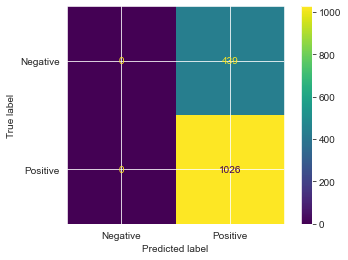

In [58]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

LogReg = LogisticRegression(random_state=2)

LogReg.fit(x_train,y_train.values.ravel())

predicted_values3 = LogReg.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values3)
acc1.append(x)
model1.append('LR')
metrics.plot_confusion_matrix(LogReg , x_test, y_test, display_labels=['Negative', 'Positive'])
confusion1 = metrics.confusion_matrix(y_test,predicted_values3)
confusion1.ravel()
print("Logistic Regression's Accuracy is: ", x*1)
print(classification_report(y_test,predicted_values3))

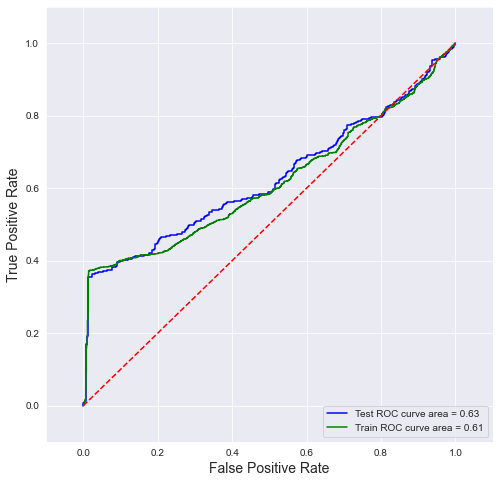

In [59]:
sns.set_style('darkgrid')
preds_train = LogReg.predict(x_train)
prob_train = np.squeeze(LogReg.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(LogReg.predict_proba(x_test)[:,1].reshape(1,-1))
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show() 

# Decision Tree

DecisionTrees's Accuracy is:  0.9610921501706484
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       439
           1       0.95      1.00      0.97      1026

    accuracy                           0.96      1465
   macro avg       0.97      0.94      0.95      1465
weighted avg       0.96      0.96      0.96      1465



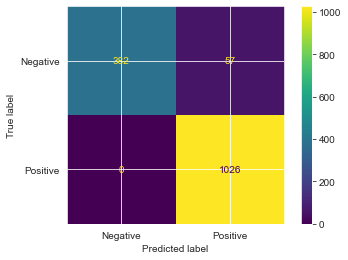

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=143,max_depth=5)

DecisionTree.fit(x_train,y_train)

predicted_values2 = DecisionTree.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values2)
acc1.append(x)
model1.append('DT')
metrics.plot_confusion_matrix(DecisionTree , x_test, y_test, display_labels=['Negative', 'Positive'])
confusion2 = metrics.confusion_matrix(y_test,predicted_values2)
confusion2.ravel()
print("DecisionTrees's Accuracy is: ", x*1)
print(classification_report(y_test,predicted_values2))


# ROC CURVE DECISION TREE

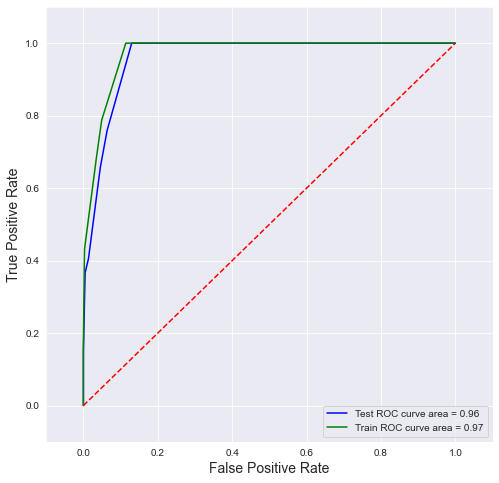

In [61]:
sns.set_style('darkgrid')
preds_train = DecisionTree.predict(x_train)
prob_train = np.squeeze(DecisionTree.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(DecisionTree.predict_proba(x_test)[:,1].reshape(1,-1))
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show() 

# Random Forest

Accuracy of RFC model is  0.9610921501706484
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       439
           1       0.95      1.00      0.97      1026

    accuracy                           0.96      1465
   macro avg       0.97      0.94      0.95      1465
weighted avg       0.96      0.96      0.96      1465



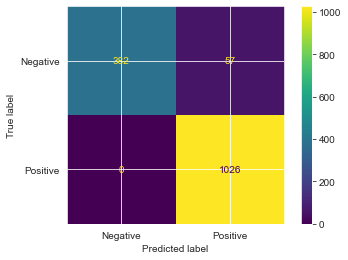

In [62]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
RFC_model = RandomForestClassifier(random_state=0)
RFC_model.fit(x_train, y_train.values.ravel())
rfc_y_pred = RFC_model.predict(x_test)
score = accuracy_score(y_test,rfc_y_pred)

print('Accuracy of RFC model is ', score)
predicted_values4 = RFC_model.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values4)
acc1.append(x)
model1.append('RFC')
metrics.plot_confusion_matrix(RFC_model , x_test, y_test, display_labels=['Negative', 'Positive'])
confusion3 = metrics.confusion_matrix(y_test,rfc_y_pred)
confusion3.ravel()
print(classification_report(y_test,predicted_values4))

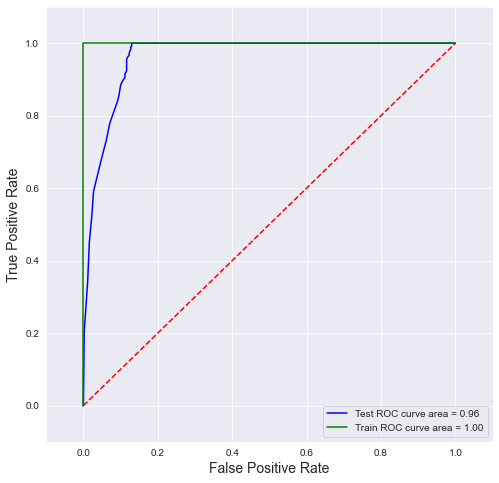

In [63]:
sns.set_style('darkgrid')
preds_train = RFC_model.predict(x_train)
prob_train = np.squeeze(RFC_model.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(RFC_model.predict_proba(x_test)[:,1].reshape(1,-1))
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show() 

# KNN Classifier

Accuracy of KNN Clasifier model is  0.7310580204778157
              precision    recall  f1-score   support

           0       0.57      0.42      0.48       439
           1       0.78      0.86      0.82      1026

    accuracy                           0.73      1465
   macro avg       0.67      0.64      0.65      1465
weighted avg       0.71      0.73      0.72      1465



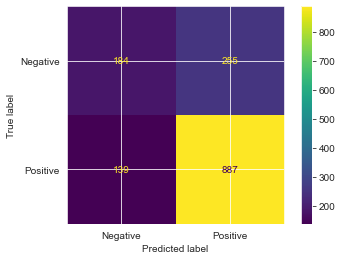

In [64]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
KNN_model =KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=2)
KNN_model.fit(x_train,y_train.values.ravel())
knn_y_pred = KNN_model.predict(x_test)
score = accuracy_score(y_test,knn_y_pred)

print('Accuracy of KNN Clasifier model is ', score)

predicted_values5 = KNN_model.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values5)
acc1.append(x)
model1.append('KNN')
metrics.plot_confusion_matrix(KNN_model , x_test, y_test, display_labels=['Negative', 'Positive'])
confusion4 = metrics.confusion_matrix(y_test,predicted_values5)
confusion4.ravel()
print(classification_report(y_test,predicted_values5))

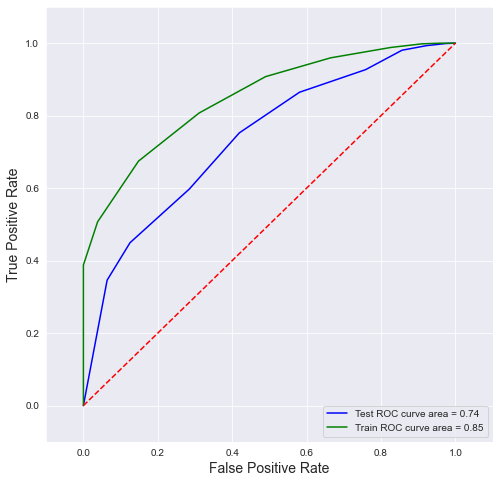

In [65]:
sns.set_style('darkgrid')
preds_train = KNN_model.predict(x_train)
prob_train = np.squeeze(KNN_model.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(KNN_model.predict_proba(x_test)[:,1].reshape(1,-1))
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show() 


# Polynomial SVM

Accuracy of SVM model is  0.7003412969283277
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       439
           1       0.70      1.00      0.82      1026

    accuracy                           0.70      1465
   macro avg       0.35      0.50      0.41      1465
weighted avg       0.49      0.70      0.58      1465



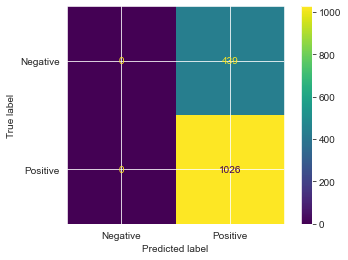

In [66]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
svm_model = SVC(kernel='poly', degree=11,probability=True)
svm_model.fit(x_train,y_train.values.ravel())
svm_y_pred = svm_model.predict(x_test)
score = accuracy_score(y_test,svm_y_pred)

print('Accuracy of SVM model is ', score)

predicted_values6 = svm_model.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values6)
acc1.append(x)
model1.append(' SVM')
metrics.plot_confusion_matrix(svm_model , x_test, y_test, display_labels=['Negative', 'Positive'])
confusion5 = metrics.confusion_matrix(y_test,svm_y_pred)
confusion5.ravel()

print(classification_report(y_test,predicted_values6))

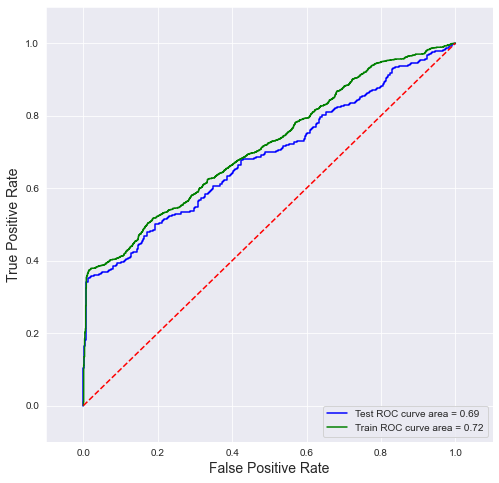

In [67]:
sns.set_style('darkgrid')
preds_train = svm_model.predict(x_train)
prob_train = np.squeeze(svm_model.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(svm_model.predict_proba(x_test)[:,1].reshape(1,-1))
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show() 

# Gradient Boost 

Accuracy of GB model is  0.9610921501706484
              precision    recall  f1-score   support

           0       0.57      0.42      0.48       439
           1       0.78      0.86      0.82      1026

    accuracy                           0.73      1465
   macro avg       0.67      0.64      0.65      1465
weighted avg       0.71      0.73      0.72      1465



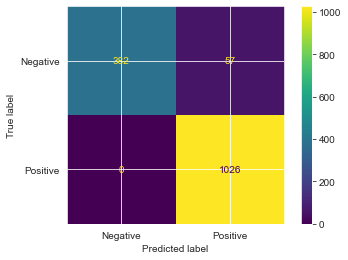

In [68]:
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
GB_model =GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train,y_train.values.ravel())
GB_model.fit(x_train,y_train.values.ravel())
gb_y_pred = GB_model.predict(x_test)
score = accuracy_score(y_test,gb_y_pred)

print('Accuracy of GB model is ', score)
predicted_values7 = KNN_model.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values7)
acc1.append(x)
model1.append('GB')
metrics.plot_confusion_matrix( GB_model, x_test, y_test, display_labels=['Negative', 'Positive'])
confusion6 = metrics.confusion_matrix(y_test,gb_y_pred)
confusion6.ravel()

print(classification_report(y_test,predicted_values7))

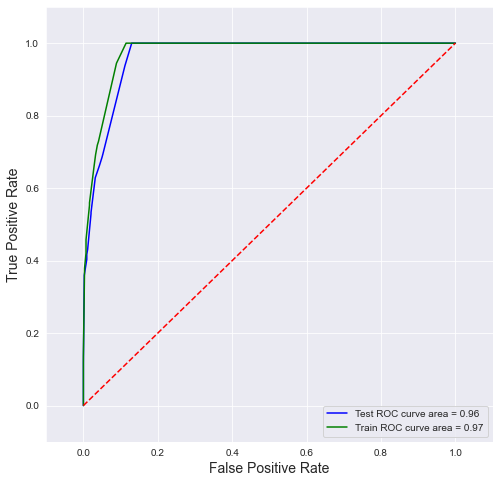

In [69]:
sns.set_style('darkgrid')
preds_train = GB_model.predict(x_train)
prob_train = np.squeeze(GB_model.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(GB_model.predict_proba(x_test)[:,1].reshape(1,-1))
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show() 

# ADA Boost 

Accuracy of ADABOOST model is  0.9597269624573379
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       439
           1       0.95      1.00      0.97      1026

    accuracy                           0.96      1465
   macro avg       0.97      0.93      0.95      1465
weighted avg       0.96      0.96      0.96      1465



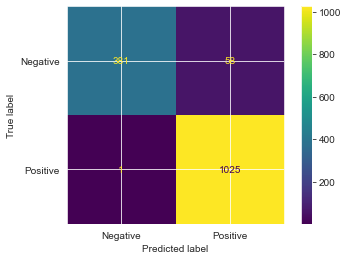

In [70]:
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = adaboost.fit(x_train,y_train.values.ravel())
y_pred = model.predict(x_test)
score = accuracy_score(y_test,y_pred)

print('Accuracy of ADABOOST model is ', score)
predicted_values8 = adaboost.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values8)
acc1.append(x)
model1.append('ADA')
metrics.plot_confusion_matrix(adaboost , x_test, y_test, display_labels=['Negative', 'Positive'])
confusion7 = metrics.confusion_matrix(y_test,y_pred)
confusion7.ravel()

print(classification_report(y_test,predicted_values8))

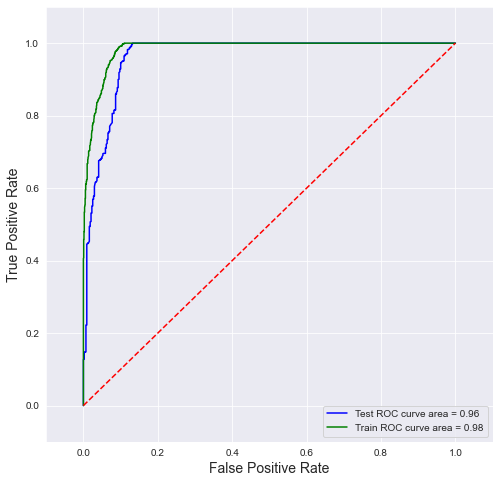

In [71]:
sns.set_style('darkgrid')
preds_train = adaboost.predict(x_train)
prob_train = np.squeeze(adaboost.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(adaboost.predict_proba(x_test)[:,1].reshape(1,-1))
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train)
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show() 